---
# <center> Лабораторна робота №5</center>
## __Тема.__ Алгоритми пошуку
## __Мета:__ засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності.
### _Викoнав Міняйло Марк 12.04.24_
-----

## <center> Хід роботи </center>
#### Oцінити асимптотичну складність

In [9]:
def linear_search(a_list, x):                ##          у найкращому # у найгіршому
    i, length = 0, len(a_list)               ##  c1           1       #       1      
    while i < length and x != a_list[i]:     ##  c2           1       #      n+1      
        i += 1                               ##  c3           0       #       n             
    return i+1 if i < length else -1         ##  c4           1       #       1        
    
# у найкращому: (c1 + c2 + c4) = O(1)
# у найгіршому: (c2 + c3)n + (c1 + c2 + c4) = a * n + b = O(n)

search_item = int(input("Введіть шуканий елемент: "))

a = [32, 1, 3, 4, 2, 1]
linear_search(a, search_item)


Введіть шуканий елемент:  2


5

#### Оцінити асимптотичну складність алгоритму бінарного пошуку в О-нотації

In [15]:
def bin_search(a_list, x, left, right):                    ##         у найкращому # у найгіршому
    if left > right or len(a_list) == 0:                   ##  c1          1       #       1        
        return -1                                          ##  c2          1       #       0
    middle = (left + right) // 2                           ##  c3          1       #       1
    if a_list[middle] == x:                                ##  c4          1       #       1
        return middle + 1                                  ##  c5          1       #       0
    elif (a_list[middle] < x):                             ##  c6          0       #       1
        return bin_search(a_list, x, middle + 1, right)    ##  c7          0       #     Log(n)
    else: # a_list[middle] > x                             ##  c8          0       #       1
        return bin_search(a_list, x, left, middle - 1)     ##  c9          0       #     Log(n)

# У найкращому: (с1 + с2) або (с1 + с3 + с4 + с5), в будь-якому випадку = О(1)
# У найгіршому: (с7 + с9)Log(n) + (с1 + с3 + с4 + с6 + с7) = a * Log(n) + b = O(Log(n))

a = range(7,21)
search_item = int(input("Введіть шуканий елемент: "))
bin_search(a, search_item, 0, len(a) - 1)

Введіть шуканий елемент:  8


2

#### Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції linear_searh() і для функції bin_searh(); 
#### За результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.

Червоною лінією зображено binary search, чорною лінією linear search


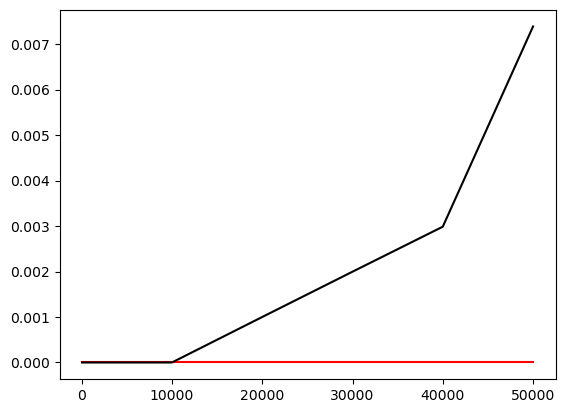

In [43]:
import matplotlib.pyplot as plt
import time
import random
%matplotlib inline

def linear_search(array, target):
    for i in range(len(array)):
        if array[i] == target:
            return i
    return -1
    
def bin_search(array, target):
    low = 0
    high = len(array) - 1

    while low <= high:
        mid = (low + high) // 2
        if array[mid] < target:
            low = mid + 1
        elif array[mid] > target:
            high = mid - 1
        else:
            return mid
    return -1

def measure_time(n):
    array = np.arange(n)
    target = np.random.randint(0, n)
    
    start_time = time.time()
    bin_search(array, target)
    end_time = time.time()
    
    return end_time - start_time

def create_dataframe(n_start, n_end, step):
    data = {'n': [], 'time': []}
    
    for n in range(n_start, n_end, step):
        time_taken = measure_time(n)
        data['n'].append(n)
        data['time'].append(time_taken)
    
    df = pd.DataFrame(data)
    return df

sizes = [50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
arrays = []
for size in sizes:
    array = [random.randint(0, 100) for _ in range(size)]
    arrays.append(array)

timeI = [] 
timeB = [] 

for n in range(len(sizes)):
    array = np.sort(arrays[n])
    target = random.choice(array)

    start_time = time.time()
    linear_search(array, target)
    timeI.append(time.time() - start_time)

    start_time = time.time()
    bin_search(array, target)
    timeB.append(time.time() - start_time)

plt.plot([50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000], [timeB[0], timeB[1],timeB[2],timeB[3],timeB[4],timeB[5],timeB[6],timeB[7],timeB[8],timeB[9]], color='red')
plt.plot([50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000], [timeI[0], timeI[1],timeI[2],timeI[3],timeI[4],timeI[5],timeI[6],timeI[7],timeI[8],timeI[9]], color='black')
print("Червоною лінією зображено binary search, чорною лінією linear search")

як бачимо бінарний пошук є ефективнішим для великих n

## <center> Контрольні питання </center>

##### _Сформулювати задачу пошуку_

Є n-на кількість товарів у магазині, кожен товар має свій унікальний номер. Щоб знайти свій товар, вам потрібно по черзі дивитись на кожну полицю шукаючи потрібний номер (Лінійне сортування), або вибрати центральну полицю і кожен наступний раз вибирати середню полицю у тій стороні де знаходиться ваш номер (у тому випадку якщо полиці містять відсортовані номери) (Бінарний пошук).

##### _Які критерії можна використовувати для оцінки ефективності алгоритмів пошуку?_

Час виконання, асимптотична складність

##### _Що таке лінійний пошук і якова його асимптотична складність?_

Лінійний пошук йде по черзі і шукає потрібний об'єкт, має асимптотичну складність O(n)

##### _Що таке бінарний (двійковий) пошук і в чому полягає його основний принцип роботи?_

Бінарний пошук кожну ітерацію зменшує обсяг удвічі щоб знайти потрібний об'єкт, має асимптотичну складність O(log(n))

##### _Які переваги і недоліки використання бінарного пошуку порівняно з лінійним?_

Перевага у часі виконання для великих n, у меншій асимптотичній складності. Із недоліків бінарний пошук вимагає щоб масив об'єктів був відсортований

##### _Які ще алгоритми пошуку існують, окрім лінійного і бінарного?_

Пошуки для графів, Ін
